# Principal Component Analysis in scikit-learn - Lab

## Introduction

Now that you've seen a brief introduction to PCA, it's time to use scikit-learn to run PCA on your own. 

## Objectives

In this lab you will: 

- Implement PCA using the scikit-learn library 
- Determine the optimal number of n components when performing PCA by observing the explained variance 
- Plot the decision boundary of classification experiments to visually inspect their performance 

## Iris dataset

To practice PCA, you'll take a look at the iris dataset. Run the cell below to load it. 

In [1]:
from sklearn import datasets
import pandas as pd
 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Before performing PCA and visualizing the principal components, it's helpful to get a little more context regarding the data that you'll be working with. Run the cell below in order to visualize the pairwise feature plots. With this, notice how the target labels are easily separable by any one of the given features.

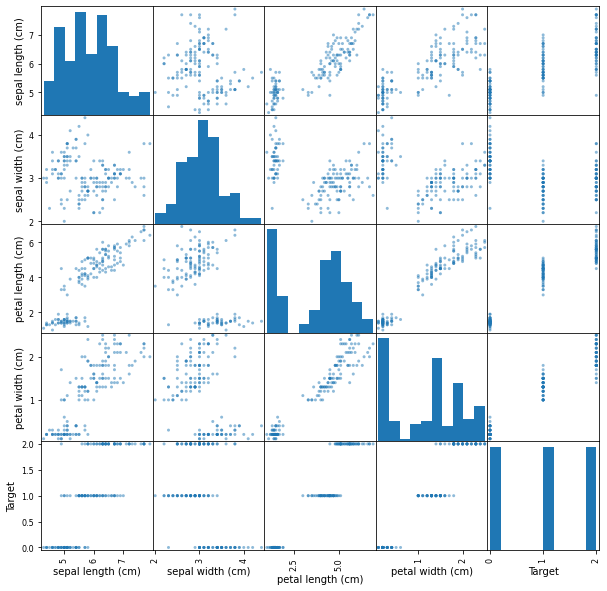

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(10,10));

- Assign all columns in the following `features` list to `X` 
- Assign the `'Target'` column to `y` 

In [3]:
# Create features and target datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features]
y = df['Target']

Standardize all the columns in `X` using `StandardScaler`. 

In [4]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Preview X
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## PCA Projection to 2-D Space

Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

- Initialize an instance of PCA from scikit-learn with two components
- Fit the data to the model
- Extract the first two principal components from the trained model 

In [6]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
#or to
# Initialize an instance of PCA from scikit-learn with two components
pca = PCA(n_components=2)

# Fit the data to the model
pca.fit(X)

# Extract the first two principal components from the trained model
#or to
# Fit PCA
principal_components = pca.transform(X)

To visualize the components, it will be useful to also look at the target associated with the particular observation. 
As such, append the target (flower type) to the principal components in a pandas dataframe.

In [7]:
# Create a new dataset from principal components 
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y
pca_df.head()

,Principal Component 1,Principal Component 2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Great, you now have a set of two dimensions, reduced from four against our target variable, the flower type. 

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples according to what flower type each example is classified as

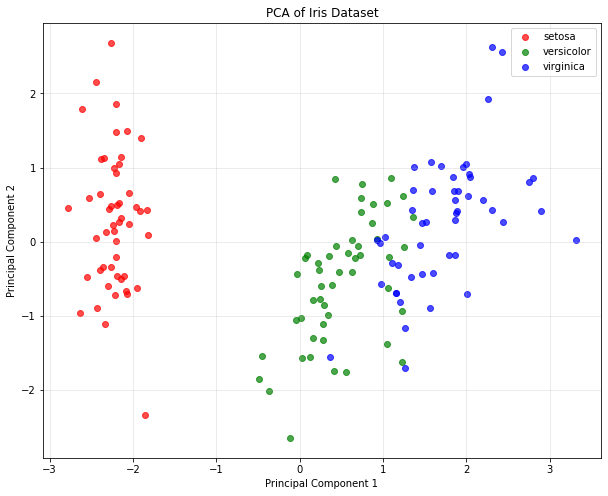

In [8]:
# Principal Components scatter plot
import matplotlib.pyplot as plt

# Create a scatter plot from principal components while color coding by flower type
plt.figure(figsize=(10, 8))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
flower_names = iris.target_names

for target, color, name in zip(targets, colors, flower_names):
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                c=color, label=name, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Your code here 


#interpretation

Different flower species are colored differently (red, green, blue)

Each point represents a flower sample projected into the 2D PCA space

The legend shows which color corresponds to which iris species

The axes represent the principal components that capture the most variance in the data

The plot shows how well the different iris species are separated in the reduced dimensional space created by PCA.

## Explained Variance


You can see above that the three classes in the dataset are fairly well separable. As such, this compressed representation of the data is probably sufficient for the classification task at hand. Compare the variance in the overall dataset to what was captured from your two primary components.

In [9]:
# Calculate the variance explained by principal components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal Variance Explained:', round(sum(pca.explained_variance_ratio_)*100, 2))

Variance of each component: [0.72962445 0.22850762]

Total Variance Explained: 95.81


Interpretation

Principal Component 1: Explains 72.96% of the total variance
Principal Component 2: Explains 22.85% of the total variance
Total Variance Explained: 95.81% of the original variance is preserved
This is an excellent result for PCA on the Iris dataset! It means:

- High Information Retention: With just 2 components instead of the original 4 features, we're retaining over 95% of the original data's information.
- Strong First Component: PC1 alone captures nearly 73% of the variance, which aligns with what we saw in the scatter plot where PC1 provided the primary separation between species (especially setosa vs the others).

- Efficient Dimensionality Reduction: We've reduced the data from 4D to 2D while losing only about 4% of the variance, making this a very effective compression for visualization and potentially for machine learning tasks.

- This high explained variance ratio is one reason why the Iris dataset is so commonly used for PCA demonstrations - the data naturally lies in a lower-dimensional subspace that PCA can effectively discover.

As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

## Compare Performance of a Classifier with PCA

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset.

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a train/test split of 80/20
- For the reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making predictions

In [12]:
# Classification - complete Iris dataset

# Your code here 
#import the libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Split the data (using original features before PCA)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Time the process for original data
start_time = time.time()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy_original = accuracy_score(y_test, y_pred)

end_time = time.time()
time_original = end_time - start_time

print("Original Data Results:")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"Time taken: {time_original:.6f} seconds")
print(f"Number of features: {X_train.shape[1]}")

Original Data Results:
Accuracy: 1.0000
Time taken: 0.018598 seconds
Number of features: 4


Great, so you can see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may be different based on the load on your CPU and number of processes running on your machine. 

Now repeat the above process for the dataset made from principal components: 

- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a train/test split of 80/20
- For the reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making predictions

In [13]:
# Classification - reduced (PCA) Iris dataset

# Split the PCA data (using principal components)
X_pca = pca_df[['Principal Component 1', 'Principal Component 2']]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=9)

# Initialize KNN classifier for PCA data
knn_pca = KNeighborsClassifier()

# Time the process for PCA data
start_time_pca = time.time()

# Train the model
knn_pca.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred_pca = knn_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

end_time_pca = time.time()
time_pca = end_time_pca - start_time_pca

print("PCA Data Results:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Time taken: {time_pca:.6f} seconds")
print(f"Number of features: {X_train_pca.shape[1]}")

PCA Data Results:
Accuracy: 0.9667
Time taken: 0.010958 seconds
Number of features: 2


Although some accuracy is lost in this representation of the data, we were able to use half of the number of features to train the model!

In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

## Visualize the Learned Decision Boundary 

Run the cell below to visualize the decision boundary learned by the k-nearest neighbor classification model trained using the principal components of the data. 

In [14]:
# Plot decision boundary using principal components 
import numpy as np 
def decision_boundary(pred_func):
    
    # Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: model.predict(x))

plt.title('decision boundary');

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

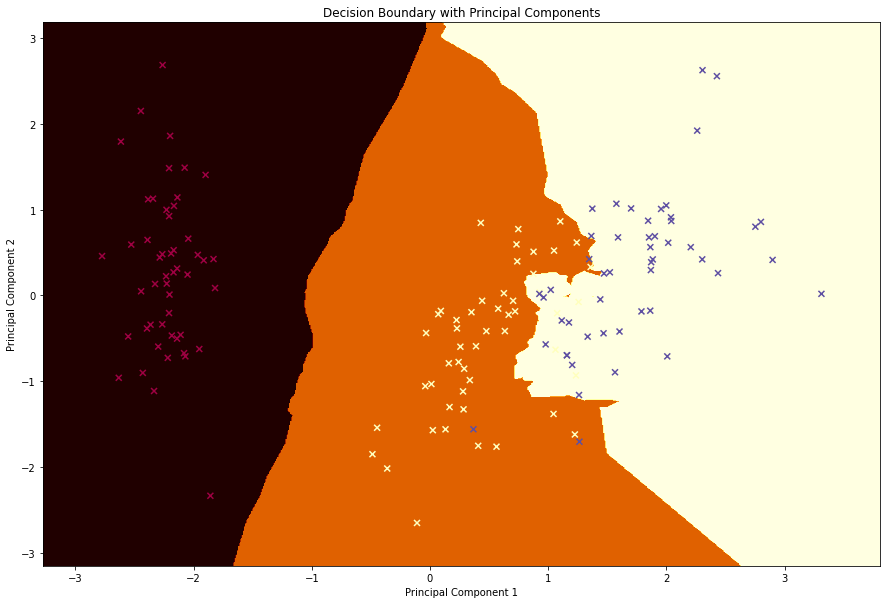

In [15]:
# Plot decision boundary using principal components 
import numpy as np 
import matplotlib.pyplot as plt

def decision_boundary(pred_func, X_data, y_data):
    
    # Set the boundary - use the PCA data which is in a DataFrame
    x_min, x_max = X_data.iloc[:, 0].min() - 0.5, X_data.iloc[:, 0].max() + 0.5
    y_min, y_max = X_data.iloc[:, 1].min() - 0.5, X_data.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X_data.iloc[:, 0], X_data.iloc[:, 1], c=y_data, cmap=plt.cm.Spectral, marker='x')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

# Use the PCA DataFrame and the trained KNN model
decision_boundary(lambda x: knn_pca.predict(x), X_pca, y)

plt.title('Decision Boundary with Principal Components')
plt.show()

## Summary 

In this lab, you applied PCA to the popular Iris dataset. You looked at the performance of a simple classifier and the impact of PCA on the accuracy of the model and the time it took to run the model. From here, you'll continue to explore PCA at more fundamental levels.